In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn

In [2]:
sns.set_style("ticks")

In [3]:
path = Path(os.getcwd()).parents[0]

modelpath = os.path.join(path, 'data/network_models/configuration_model')


datapath = os.path.join(modelpath, 'analysis')

figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)
    
fig3path = os.path.join(figpath, 'Fig3')
hfn.dir_check(fig3path)

fig3panelpaths = os.path.join(fig3path, 'panels')
hfn.dir_check(fig3panelpaths)

# load summary dataframe

In [4]:
pars_df = pd.read_hdf(os.path.join(datapath, 'allpars_df.h5'))

In [5]:
pars_df = pars_df.sort_values(by = ['input_degree', 'starter_degree'])

In [6]:
seq_col_bp= sns.color_palette("Oranges", 4)
seq_col_yg = sns.color_palette("Greens", 5)

In [7]:
flierprops = dict(markeredgecolor='black',
                      markerfacecolor='None')
boxprops = dict(alpha=0.4)

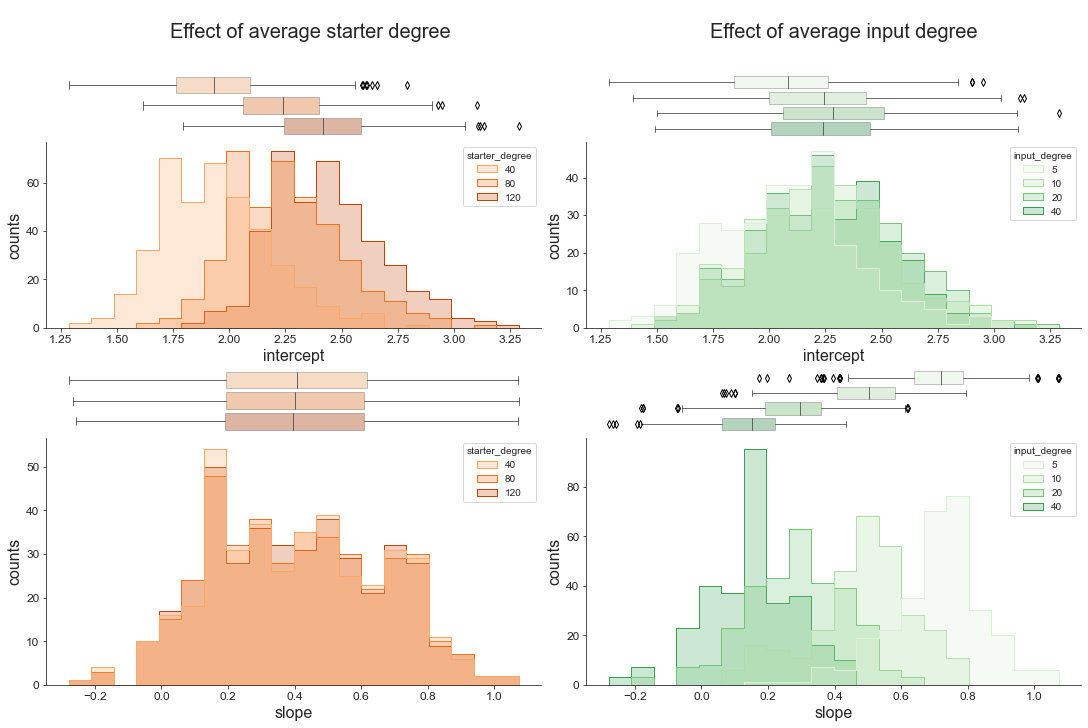

In [8]:
f = plt.figure(figsize = (15, 10), constrained_layout = True)
gs = f.add_gridspec(10,6)

ax_title1 = f.add_subplot(gs[0:1, :3])
plt.text(0.25, 0.5,'Effect of average starter degree', fontsize = 20)
ax_title1.set_axis_off()
ax_box1 = f.add_subplot(gs[1:2, :3])
ax_hist1 = f.add_subplot(gs[2:5, :3])

sns.boxplot(data = pars_df, 
            x = 'intercept', 
            y= 'starter_degree', 
            orient="h", 
            ax=ax_box1, 
            palette = seq_col_bp[1:4], 
            linewidth = 0.75,
            boxprops = boxprops,
            flierprops = flierprops)
h1 = sns.histplot(data = pars_df, 
                  x = 'intercept', 
                  hue = 'starter_degree', 
                  element="step", 
                  ax = ax_hist1, 
                  palette = seq_col_bp[1:4], 
                  bins = 20)
ax_box1.set_axis_off()
ax_hist1.spines['right'].set_visible(False)
ax_hist1.spines['top'].set_visible(False)
h1.set_xlabel("intercept",fontsize=16)
h1.set_ylabel("counts",fontsize=16)
h1.tick_params(labelsize=12)

ax_title2 = f.add_subplot(gs[0:1, 3:])
plt.text(0.25,0.5,'Effect of average input degree', fontsize = 20)
ax_title2.set_axis_off()
ax_box2 = f.add_subplot(gs[1:2, 3:])
ax_hist2 = f.add_subplot(gs[2:5, 3:])
sns.boxplot(data = pars_df, 
            x = 'intercept', 
            y= 'input_degree', 
            orient="h", 
            ax=ax_box2, 
            palette = seq_col_yg[0:4], 
            linewidth = 0.75,
            boxprops = boxprops,
            flierprops = flierprops)
h2 = sns.histplot(data = pars_df, 
                  x = 'intercept', 
                  hue = 'input_degree', 
                  element="step", 
                  ax = ax_hist2, 
                  palette = seq_col_yg[0:4], 
                  bins = 20)
ax_box2.set_axis_off()
ax_hist2.spines['right'].set_visible(False)
ax_hist2.spines['top'].set_visible(False)
h2.set_xlabel("intercept",fontsize=16)
h2.set_ylabel("counts",fontsize=16)
h2.tick_params(labelsize=12)

ax_box3 = f.add_subplot(gs[5:6, :3])
ax_hist3 = f.add_subplot(gs[6:10, :3])

sns.boxplot(data = pars_df, 
            x = 'slope', 
            y= 'starter_degree', 
            orient="h", 
            ax=ax_box3, 
            palette = seq_col_bp[1:4], 
            linewidth = 0.75,
            boxprops = boxprops,
            flierprops = flierprops)
h3 = sns.histplot(data = pars_df, 
                  x = 'slope', 
                  hue = 'starter_degree', 
                  element="step", 
                  ax = ax_hist3, 
                  palette = seq_col_bp[1:4], 
                  bins = 20)
ax_box3.set_axis_off()
ax_hist3.spines['right'].set_visible(False)
ax_hist3.spines['top'].set_visible(False)

h3.set_xlabel("slope",fontsize=16)
h3.set_ylabel("counts",fontsize=16)
h3.tick_params(labelsize=12)


ax_box4 = f.add_subplot(gs[5:6, 3:])
ax_hist4 = f.add_subplot(gs[6:10, 3:])

sns.boxplot(data = pars_df, 
            x = 'slope', 
            y= 'input_degree', 
            orient="h", 
            ax=ax_box4, 
            palette = seq_col_yg[0:4], 
            linewidth = 0.75,
            boxprops = boxprops,
            flierprops = flierprops)
h4 = sns.histplot(data = pars_df, 
                  x = 'slope', 
                  hue = 'input_degree', 
                  element="step", 
                  ax = ax_hist4, 
                  palette = seq_col_yg[0:4], 
                  bins = 20)
ax_box4.set_axis_off()
ax_hist4.spines['right'].set_visible(False)
ax_hist4.spines['top'].set_visible(False)


h4.set_xlabel("slope",fontsize=16)
h4.set_ylabel("counts",fontsize=16)
h4.tick_params(labelsize=12)
            
ax_box1.set_rasterized(True)
ax_box2.set_rasterized(True)
ax_box3.set_rasterized(True)
ax_box4.set_rasterized(True)
ax_hist1.set_rasterized(True)
ax_hist2.set_rasterized(True)
ax_hist3.set_rasterized(True)
ax_hist4.set_rasterized(True)

plt.savefig(os.path.join(fig3panelpaths, 'fig3.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig3panelpaths, 'fig3.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)